*Loading Image*: we load the image for preprocessing.

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
dataset_path = '/content/drive/MyDrive/Animals'
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']



In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


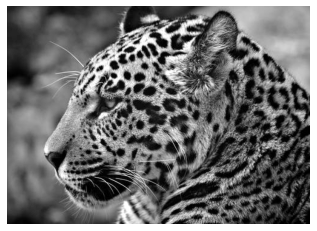

In [ ]:
## load image as grayscale
image = cv2.imread("/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg", cv2.IMREAD_GRAYSCALE )
plt.imshow(image, cmap= "gray"), plt.axis("off")
plt.show()

In [ ]:
#An array object represents a multidimensional, homogeneous array of fixed-size items.
type(image)

numpy.ndarray

In [ ]:
image

array([[ 39,  38,  38, ..., 146, 144, 142],
       [ 37,  37,  36, ..., 147, 145, 143],
       [ 35,  34,  34, ..., 149, 147, 145],
       ...,
       [ 18,  18,  18, ...,   0,   0,   0],
       [ 16,  16,  16, ...,   0,   0,   0],
       [ 15,  14,  14, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
# there are 333 rows and 500 columns
image.shape

(359, 500)

In [ ]:
## To check the pixels of the image we use the below code
image[0,0]

39

In [ ]:
## Now we can load the image in colored form 
image_bgr = cv2.imread("/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg", cv2.IMREAD_COLOR)
image_bgr[0,0]


array([23, 34, 54], dtype=uint8)

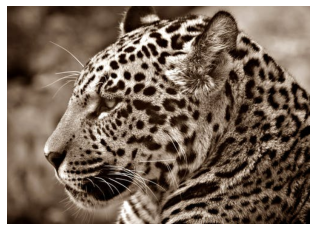

In [ ]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show()

**Resizing The Image**

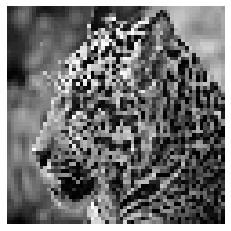

In [ ]:
image_50x50 = cv2.resize(image,(60,60))
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

**Cropping Images**

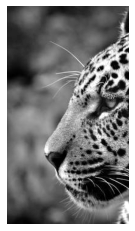

In [ ]:
# Select first half of the columns and all rows
image_cropped = image[:,:200]

plt.imshow(image_cropped,cmap="gray"), plt.axis("off")
plt.show()

**Blurring Images**

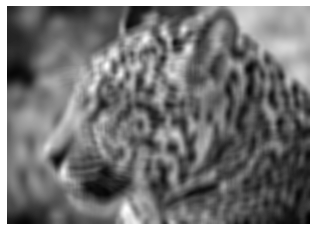

In [ ]:
#We can change the blurring size by changing the dimensions
# Blur image
image_blurry = cv2.blur(image, (10,20))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

Kernels are widely used in image processing to do everything from sharpening to
edge detection, and will come up repeatedly in this chapter.

In [ ]:
# Create kernel
kernel = np.ones((5,5)) / 25.0
# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

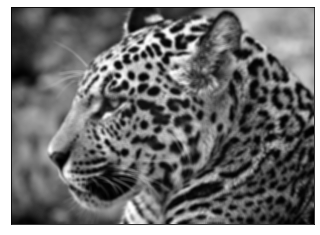

In [ ]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

**SHARPENING IMAGES**

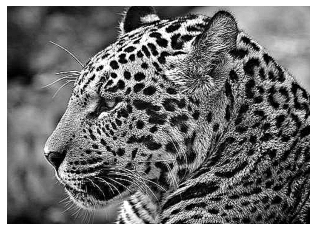

In [ ]:
# Create kernel
kernel = np.array([[0, -2, 0],
[-1, 6,-1],
[0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

**ISOLATING COLORS**

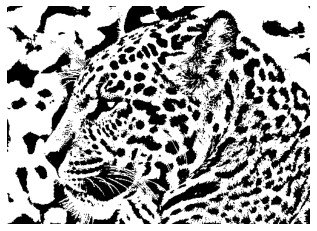

In [ ]:

# Load image as grayscale
image_grey = cv2.imread("/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg", cv2.IMREAD_GRAYSCALE)
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

**Detecting Edges**

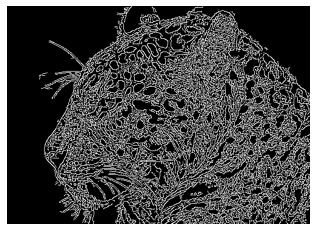

In [ ]:
# Load image and convert to RGB
image_gray = cv2.imread("/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)
# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

**Detecting Corners**

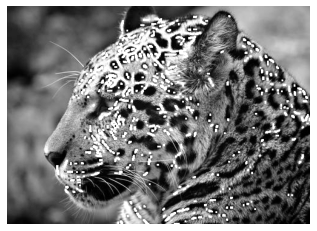

In [ ]:
image_bgr = cv2.imread("/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)
# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04 
# Detect corners
detector_responses = cv2.cornerHarris(image_gray,block_size,aperture,free_parameter)
# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)
#Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr=image_bgr[detector_responses >threshold *detector_responses.max()] = [255,255,255]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)# Convert to grayscale
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


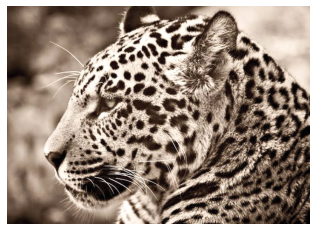

In [ ]:
pic1 = cv2.imread('/content/drive/MyDrive/Animals/Jaguar/jaguar-halbwuchsig-sepia-profile-41002.jpeg')
image_yuv = cv2.cvtColor(pic1, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

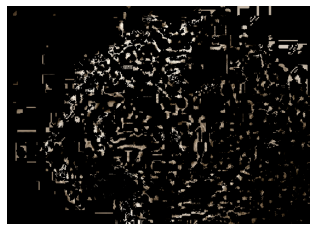

In [ ]:
image_hsv = cv2.cvtColor(pic1, cv2.COLOR_BGR2HSV)
# Define range of blue values in HSV
lower_blue = np.array([16,15,16])
upper_blue = np.array([110,255,255])
# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# Mask image
image_bgr_masked = cv2.bitwise_and(pic1,pic1, mask=mask)
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

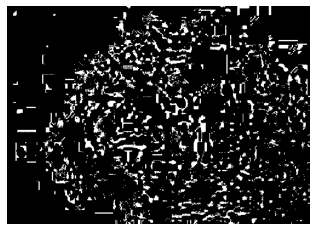

In [ ]:
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()